## 문제 1
- 442명의 당뇨병 환자를 대상으로 한 검사 결과 데이터: 
    - https://data.hossam.kr/E04/diabetes.xlsx
- target = 당뇨병 진행률(종속변수)
- 주어진 데이터는 표준화가 적용되어 있다.
- 이를 활용하여 당뇨병 발병 가능성을 예측할 수 있는 회귀모델을 구현하고 분석 결과를 보고하라.

#### 필요한 패키지 참조 및 데이터 가져오기

In [56]:
from pca import pca
from pandas import read_excel, DataFrame, merge, melt
from matplotlib import pyplot as plt
import seaborn as sb

import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols

In [57]:
df = read_excel('https://data.hossam.kr/E04/diabetes.xlsx')
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


#### 데이터 전처리
- 독립변수 및 종속변수 추출
- 이미 표준화 되어있으므로 표준화 과정 생략

In [58]:
x_train_std_df = df.drop(['target'], axis=1)
y_train_std_df = df.filter(['target'], axis=1)

#### 전체 요인에 대한 회귀분석
- .summary 요약결과
- .table 결과표 확인

In [59]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
mdf
xnames = list(x_train_std_df.columns)

model1 = my_ols(mdf, y='target', x = xnames)
print(model1.summary)
print(model1.table)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        11:41:15   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.0

#### 차원 축소 적용(주성분 분석 - PCA 사용)

In [60]:
pca_model = pca()
fit = pca_model.fit_transform(x_train_std_df)
topfeat = fit['topfeat']
topfeat

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,PC,feature,loading,type
0,PC1,s4,0.428834,best
1,PC2,s1,0.573027,best
2,PC3,bp,0.513571,best
3,PC4,sex,-0.679860,best
4,PC5,age,-0.686876,best
5,PC6,s6,0.805066,best
6,PC7,s5,0.647302,best
7,PC8,bp,-0.477360,best
8,PC7,bmi,-0.519874,weak
9,PC2,s2,0.455942,weak


#### 선정된 요인 이름 추출

In [61]:
best = topfeat.query("type == 'best'")
feature = list(set(list(best['feature'])))
feature

['sex', 's6', 'age', 'bp', 's1', 's4', 's5']

#### 선정된 요인을 사용하여 회귀분석 수행

In [62]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
model2 = my_ols(mdf, y='target', x=feature)
model2.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     48.44
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           1.06e-50
Time:                        11:41:23   Log-Likelihood:                -2419.6
No. Observations:                 442   AIC:                             4855.
Df Residuals:                     434   BIC:                             4888.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.770     54.932      0.000     146.690     157.577
sex         -290.7876     64.800     -4.487      0.000    -418.148    -163.427
s6           150.1445     70.100      2.142      0.033      12.366     287.923
age           -8.6419     64.182     -0.135      0.893    -134.789     117.505
bp           456.9719     68.115      6.709      0.000     323.095     590.849
s1          -358.8123     74.225     -4.834      0.000    -504.698    -212.927
s4           412.2661     84.704      4.867      0.000     245.785     578.747
s5           642.7408     82.452      7.795      0.000     480.686     804.795
==============================================================================
Omnibus:                        2.903   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.906
Skew:                           0.162   Prob(JB):                        0.234
Kurtosis:                       2.771   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 두 가지 모델의 결과 비교
- 결과 비교를 위한 데이터프레임 생성

In [63]:
rdf = DataFrame({
    's6': mdf['s6'],
    'y': mdf['target'],
    'y1': model1.fit.predict(x_train_std_df),
    'y2': model2.fit.predict(x_train_std_df)
})

rdf

,s6,y,y1,y2
0,-0.017646,151,206.116677,172.007474
1,-0.092204,75,68.071033,82.086360
2,-0.025930,141,176.882790,147.306696
3,-0.009362,206,166.914458,172.080542
4,-0.046641,135,128.462258,145.020055
...,...,...,...,...
437,0.007207,178,193.017565,186.443274
438,0.044485,104,101.055814,98.010573
439,0.015491,132,121.226681,125.962704
440,-0.025930,220,211.858945,195.884545


#### 실제 값과 model1의 예측 결과를 재배치

In [64]:
mdf1 = melt(rdf, id_vars=['s6'], value_vars=['y', 'y1'])
mdf1

,s6,variable,value
0,-0.017646,y,151.000000
1,-0.092204,y,75.000000
2,-0.025930,y,141.000000
3,-0.009362,y,206.000000
4,-0.046641,y,135.000000
...,...,...,...
879,0.007207,y1,193.017565
880,0.044485,y1,101.055814
881,0.015491,y1,121.226681
882,-0.025930,y1,211.858945


#### 실제 값과 model2의 예측 결과를 재배치

In [65]:
mdf2 = melt(rdf, id_vars = ['s6'], value_vars=['y', 'y2'])
mdf2

,s6,variable,value
0,-0.017646,y,151.000000
1,-0.092204,y,75.000000
2,-0.025930,y,141.000000
3,-0.009362,y,206.000000
4,-0.046641,y,135.000000
...,...,...,...
879,0.007207,y2,186.443274
880,0.044485,y2,98.010573
881,0.015491,y2,125.962704
882,-0.025930,y2,195.884545


#### 각각의 재배치 결과를 시각화

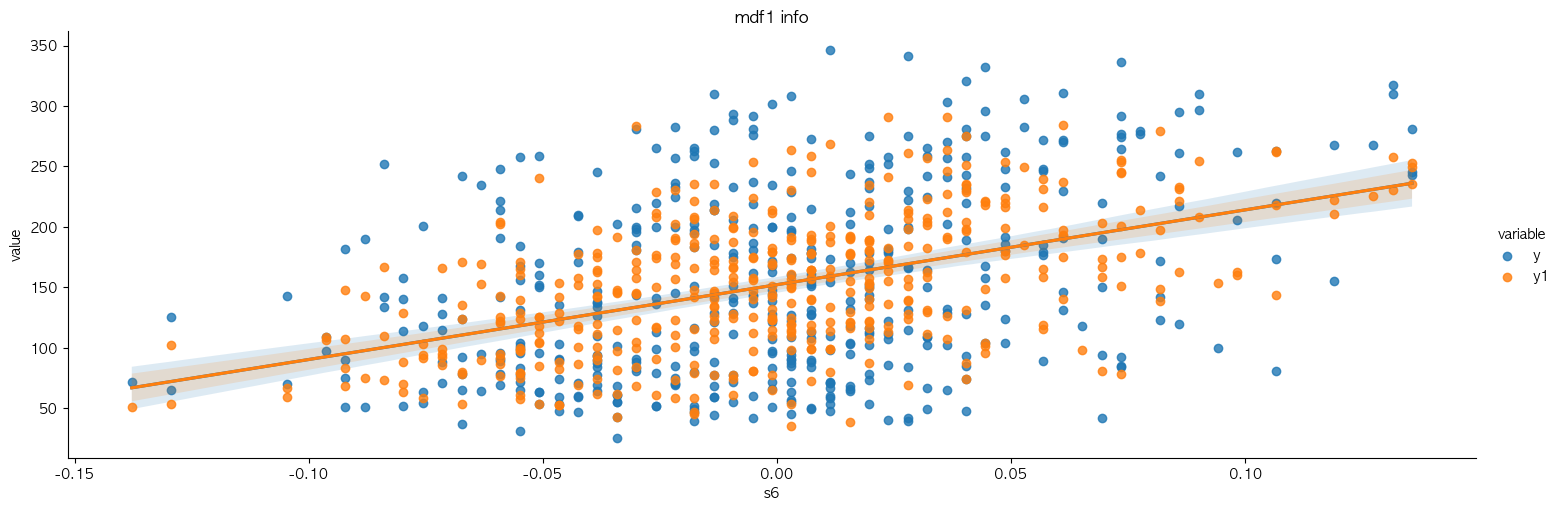

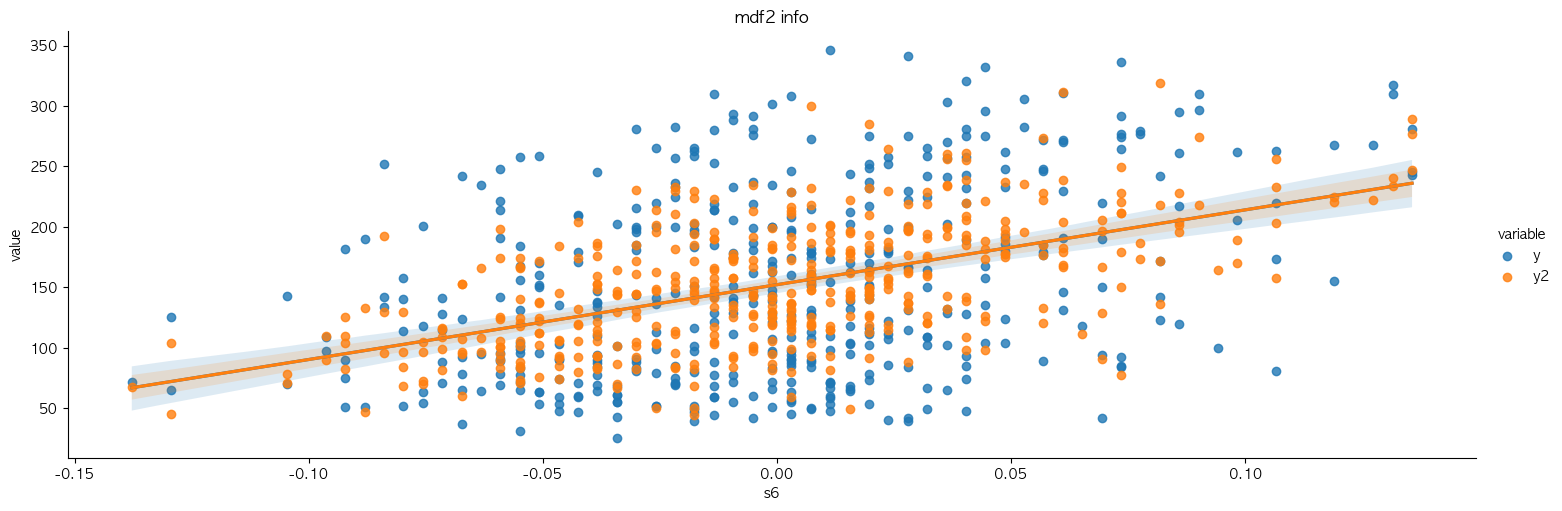

In [66]:
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
# plt.rcParams["figure.figsize"] = (10, 5) # lmplot()은 이 파라미터가 안 먹힘
plt.rcParams["axes.unicode_minus"] = False

sb.lmplot(data=mdf1, x="s6", y="value", hue="variable", height=5, aspect=3)
plt.title('mdf1 info')
sb.lmplot(data=mdf2, x="s6", y="value", hue="variable", height=5, aspect=3)
plt.title('mdf2 info')

plt.show()
plt.close()

## 문제 2
- 다음의 데이터는 뉴욕 멘하튼의 주택임대료에 영향을 준다고 예상되는 변수들과 주택 임대료를 정리한 것이다.
> https://data.hossam.kr/E04/manhattan.xlsx
- 다양한 변수 중에서 목표로 하는 종속변수는 `rent`이다. 분석하라


In [69]:
from pca import pca
from pandas import read_excel, DataFrame, merge, melt
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_ols, scalling, get_best_features, setCategory

In [70]:
# 데이터 가져오기
df = read_excel('https://data.hossam.kr/E04/manhattan.xlsx')
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


#### 데이터 전처리
- 종속변수 및 독립변수 분리
- 불필요한 변수 제거
- 'neighborhood' 컬럼의 string값을 int값으로 변환
- 데이터 표준화, 이를 데이처프레임으로 재구성

In [76]:
# 모든 borough가 Manhattan이므로 borough도 컬럼 제거
print(df['borough'].value_counts())
x_train = df.drop(['rent', 'borough'], axis = 1)
y_train = DataFrame(df['rent'])

# neighborhood컬럼의 string값을 int값으로 변환
neighborhood_len = len(x_train['neighborhood'].value_counts())

neighborhood_list = []
for a in x_train['neighborhood']:
    if a not in neighborhood_list:
        neighborhood_list.append(a)
    else:
        continue

neighborhood_dict = {}
n = 1
for a in range(len(neighborhood_list)):
    if neighborhood_list[a] not in neighborhood_dict:
        neighborhood_dict[neighborhood_list[a]] = n
        n += 1
    else:
        continue

x_train['neighborhood'] = x_train['neighborhood'].map(neighborhood_dict)
x_train

# 데이터 표준화
scaler = StandardScaler()
x_train_std_df = DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
y_train_std_df = DataFrame(scaler.fit_transform(y_train), columns=y_train.columns)

print(x_train_std_df)
print(y_train_std_df)

borough
Manhattan    3539
Name: count, dtype: int64
      bedrooms  bathrooms  size_sqft  min_to_subway     floor  \
0    -1.397410  -0.611790  -0.962011       0.730862 -0.904097   
1     0.669863   1.056257   2.218694      -0.176116 -0.995343   
2    -0.363774  -0.611790  -0.049651      -0.538908  3.566974   
3    -0.363774  -0.611790   0.073811      -0.357512 -0.356619   
4     0.669863   1.056257   8.077886      -0.357512 -0.721604   
...        ...        ...        ...            ...       ...   
3534 -0.363774  -0.611790  -0.853197      -0.357512 -0.356619   
3535  0.669863   1.056257   0.101014       0.005279 -0.174126   
3536 -1.397410  -0.611790  -1.443302      -0.538908 -0.630358   
3537 -0.363774  -0.611790  -0.604182       0.186675 -0.630358   
3538 -0.363774  -0.611790  -0.258908      -0.176116 -0.082880   

      building_age_yrs   no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0            -0.888763  1.21585      2.336243         -0.436784    -0.625393   
1      

#### 주성분 분석 시행 - PCA 사용

In [83]:
feature, topfeat_df = get_best_features(x_train_std_df)

# best feature만 추출
feature

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [15] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [12] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[12]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


['has_dishwasher',
 'no_fee',
 'has_elevator',
 'building_age_yrs',
 'neighborhood',
 'size_sqft',
 'has_gym',
 'has_roofdeck',
 'min_to_subway',
 'has_patio']

In [84]:
mdf = merge(x_train_std_df, y_train_std_df, left_index=True, right_index=True)
ols_result = my_ols(mdf, y='rent', x=feature)
ols_result.summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1099.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:55:03   Log-Likelihood:                -2518.9
No. Observations:                3539   AIC:                             5060.
Df Residuals:                    3528   BIC:                             5128.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -4.316e-17      0.008   -5.2e-15      1.000      -0.016       0.016
has_dishwasher       0.0004      0.009      0.048      0.962      -0.018       0.019
no_fee              -0.0089      0.009     -1.016      0.310      -0.026       0.008
has_elevator         0.0036      0.012      0.308      0.758      -0.019       0.026
building_age_yrs    -0.1471      0.009    -16.869      0.000      -0.164      -0.130
neighborhood        -0.0077      0.009     -0.908      0.364      -0.024       0.009
size_sqft            0.8590      0.008    102.031      0.000       0.842       0.875
has_gym             -0.0002      0.012     -0.020      0.984      -0.023       0.022
has_roofdeck         0.0041      0.010      0.389      0.697      -0.016       0.025
min_to_subway       -0.0265      0.009     -3.083      0.002      -0.043      -0.010
has_patio            0.0015      0.008      0.173      0.863      -0.015       0.018
==============================================================================
Omnibus:                      885.152   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11027.762
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                      11.487   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 실제 임대료와 예측된 임대료 비교

In [86]:
rdf = DataFrame({
    'x': mdf['building_age_yrs'],
    'rent': mdf['rent'],
    'y': ols_result.fit.predict(x_train_std_df)
})
rdf

,x,rent,y
0,-0.888763,-0.818669,-0.699858
1,1.117593,2.011480,1.758517
2,-0.584000,-0.202044,0.088969
3,-0.533206,-0.108760,0.172149
4,2.133470,3.908786,6.652670
...,...,...,...
3534,-0.914160,-0.293747,-0.594637
3535,-1.091938,0.485729,0.247651
3536,1.117593,-1.087770,-1.409234
3537,-0.964953,-0.526167,-0.389114


In [87]:
melt_df = melt(rdf, id_vars=['x'], value_vars=['rent','y'])
melt_df

,x,variable,value
0,-0.888763,rent,-0.818669
1,1.117593,rent,2.011480
2,-0.584000,rent,-0.202044
3,-0.533206,rent,-0.108760
4,2.133470,rent,3.908786
...,...,...,...
7073,-0.914160,y,-0.594637
7074,-1.091938,y,0.247651
7075,1.117593,y,-1.409234
7076,-0.964953,y,-0.389114


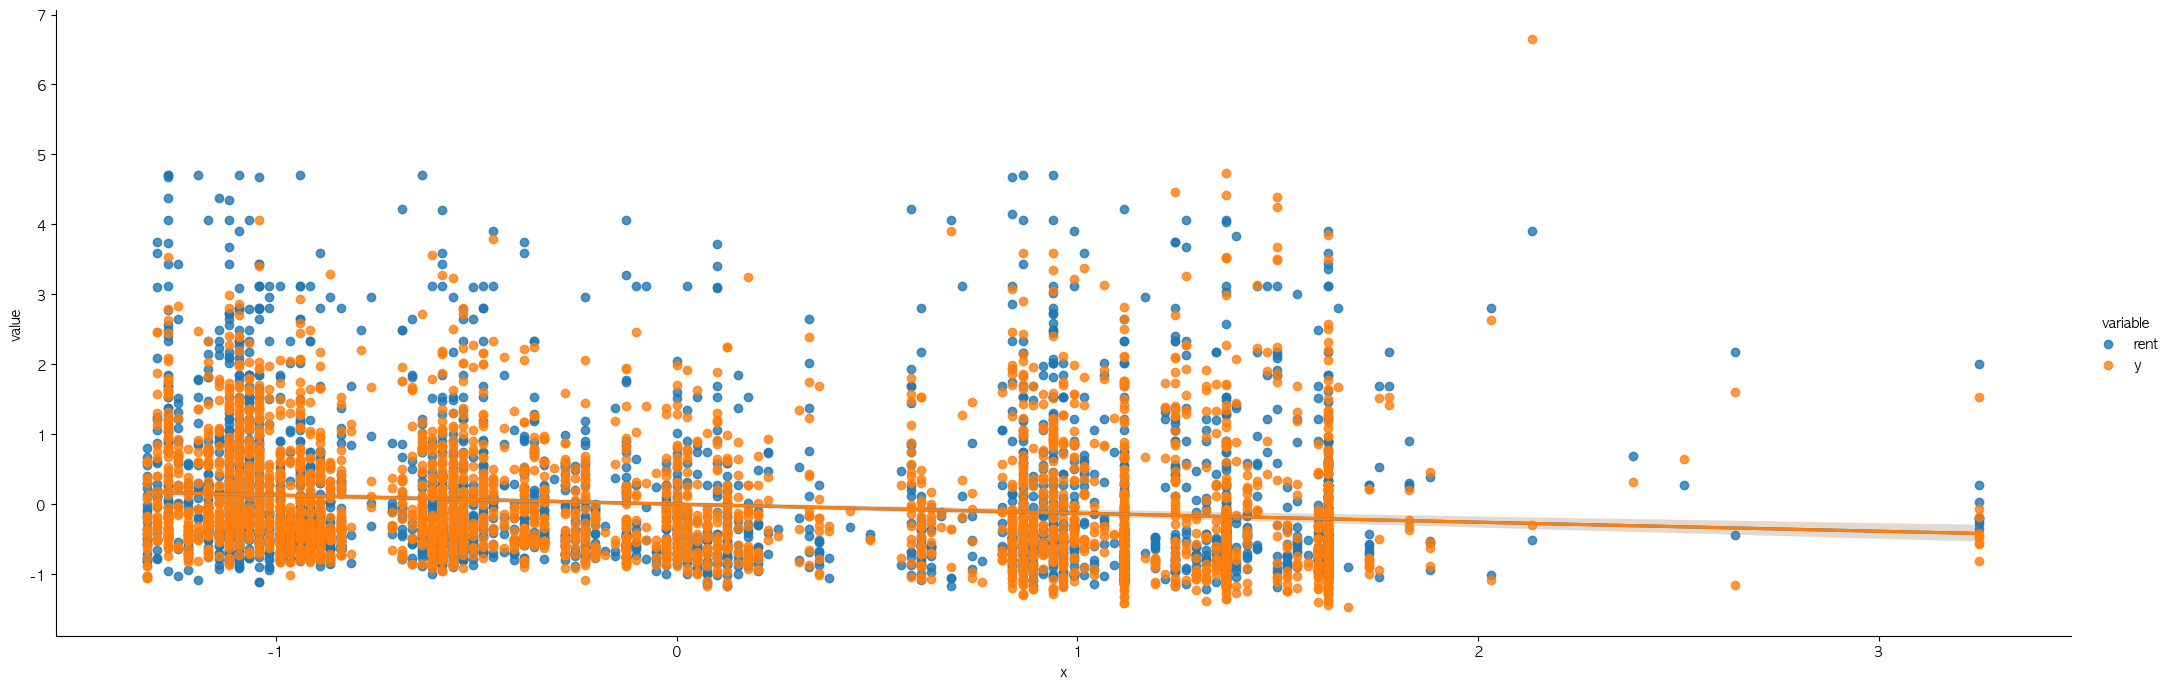

In [88]:
sb.lmplot(data=melt_df, x="x", y="value", hue="variable", height=7, aspect=3)
plt.show()
plt.close()